In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:27<00:00, 42.7MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.6MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.regularizers import l2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [10]:
# Generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
# Normalize

def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [12]:
# CNN Model

model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization
model.add(Dropout(rate=0.3))  # Increased dropout
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))   # L2 regularization
model.add(Dropout(rate=0.3))  # Increased dropout
model.add(Dense(1, activation='sigmoid'))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [14]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 107ms/step - loss: 1.2420 - accuracy: 0.8540 - val_loss: 1.3353 - val_accuracy: 0.8330
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 1.3194 - accuracy: 0.8619 - val_loss: 1.4926 - val_accuracy: 0.8258
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 1.2962 - accuracy: 0.8748 - val_loss: 1.4057 - val_accuracy: 0.8394
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 1.2219 - accuracy: 0.8815 - val_loss: 1.2778 - val_accuracy: 0.8512
Epoch 5/10
625/625 [==============================] - 64s 103ms/step - loss: 1.1744 - accuracy: 0.8884 - val_loss: 1.2459 - val_accuracy: 0.8310
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 1.0857 - accuracy: 0.8993 - val_loss: 1.2799 - val_accuracy: 0.8242
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 1.0830 - accuracy: 0.9000 - val_loss: 1.1837 - val_ac

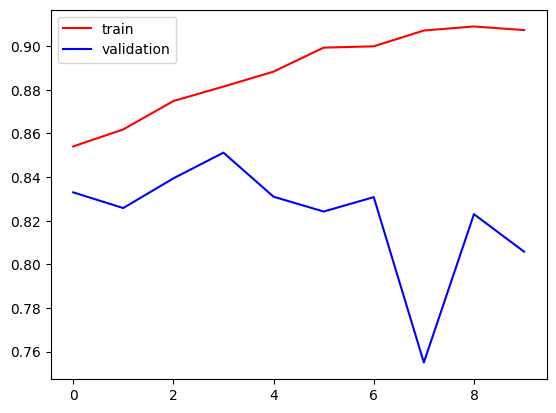

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'train', color = 'red')
plt.plot(history.history['val_accuracy'], label = 'validation', color = 'blue')
plt.legend()
plt.show()

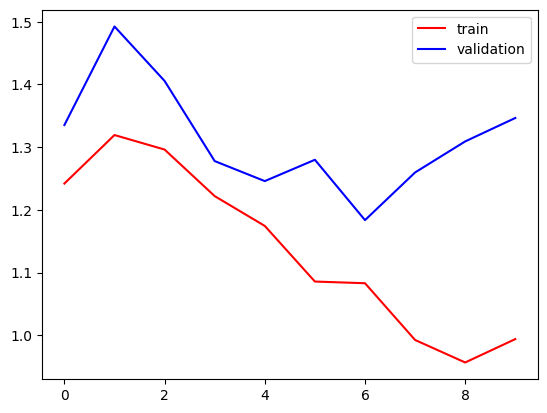

In [18]:
plt.plot(history.history['loss'], label = 'train', color = 'red')
plt.plot(history.history['val_loss'], label = 'validation', color = 'blue')
plt.legend()
plt.show()

In [19]:
import cv2

In [22]:
test_image = cv2.imread('/content/test/dogs/dog.10739.jpg')

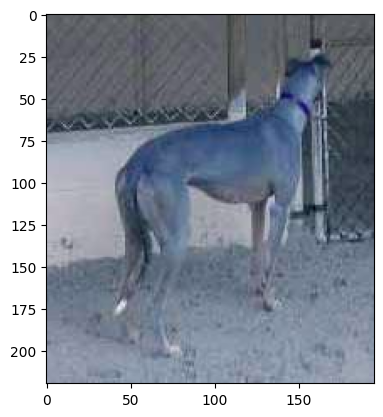

In [23]:
plt.imshow(test_image)

In [24]:
test_image = cv2.resize(test_image, (256, 256))

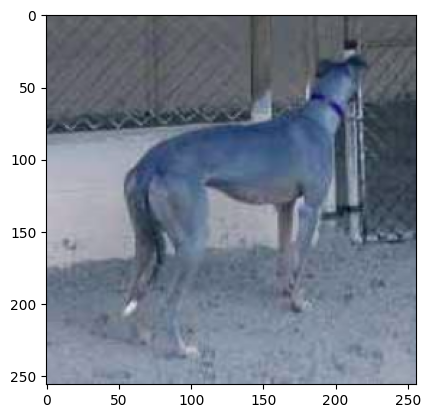

In [25]:
plt.imshow(test_image)

In [26]:
test_input = test_image.reshape((1, 256, 256, 3))

In [27]:
model.predict(test_input)

1/1 [==============================] - 0s 260ms/step


array([[1.]], dtype=float32)

In [28]:
model.save('final_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
